In [3]:
# Import necessary libraries
import torch
from torch import nn
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import time
# Import the seaborn library for plotting
import seaborn as sns

In [4]:
df = pd.read_csv(r'Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<AxesSubplot:>

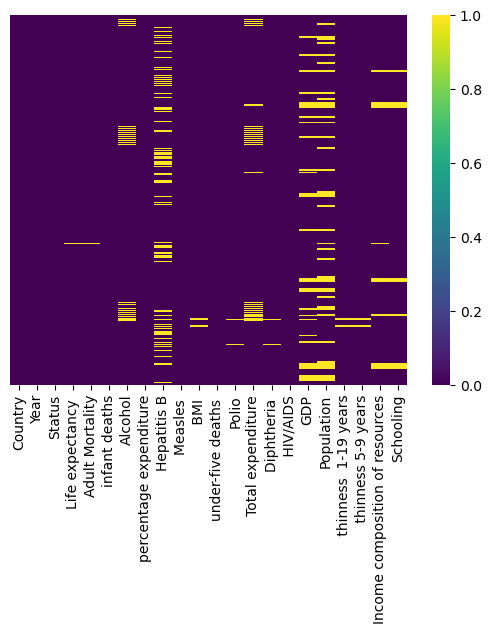

In [6]:
# Checking the Missing Values
sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis")

In [7]:
#A summary of missing variables represented as a percentage of the total missing content. 
def missingness_summary(df, print_log=False, sort='ascending'):
  s = df.isnull().sum()*100/df.isnull().count()
  s = s [s > 0]
  if sort.lower() == 'ascending':
    s = s.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    s = s.sort_values(ascending=False)  
  if print_log: 
    print(s)
  
  return pd.Series(s)

suspects = missingness_summary(df, True, 'descending')

Population                         22.191967
Hepatitis B                        18.822328
GDP                                15.248468
Total expenditure                   7.692308
Alcohol                             6.603131
Income composition of resources     5.684139
Schooling                           5.547992
 BMI                                1.157250
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Polio                               0.646698
Diphtheria                          0.646698
Life expectancy                     0.340368
Adult Mortality                     0.340368
dtype: float64


In [8]:
selected_columns = ["Life expectancy ", "Adult Mortality", "Alcohol", "GDP"]

# new DataFrame object with the selected columns only
df_subset = df[selected_columns]

df_subset

,Life expectancy,Adult Mortality,Alcohol,GDP
0,65.0,263.0,0.01,584.259210
1,59.9,271.0,0.01,612.696514
2,59.9,268.0,0.01,631.744976
3,59.5,272.0,0.01,669.959000
4,59.2,275.0,0.01,63.537231
...,...,...,...,...
2933,44.3,723.0,4.36,454.366654
2934,44.5,715.0,4.06,453.351155
2935,44.8,73.0,4.43,57.348340
2936,45.3,686.0,1.72,548.587312


In [9]:
df["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

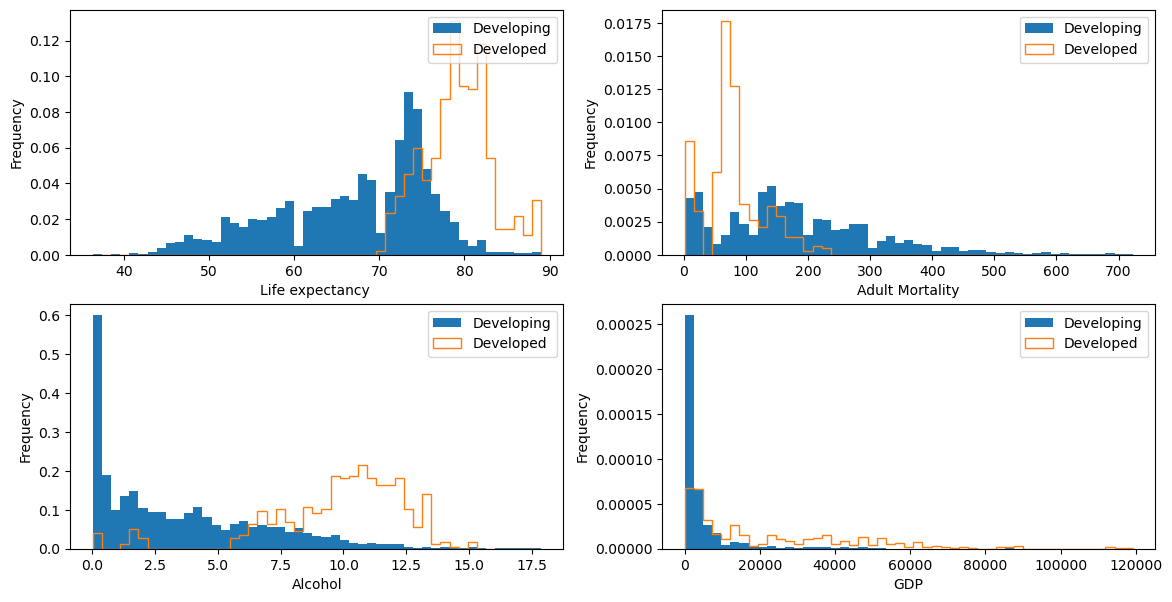

In [10]:
# create mask for developed/developing country comparison
dev_mask = (df['Status'] == "Developed")

# Rearrange selected columns to a 2x2 matrix (as numpy array)

colname_matrix = df_subset.columns.to_numpy().reshape(2,2)
fig, axs = plt.subplots(2,2, figsize=(14, 7))

for row in range(2):
    for col in range(2):
        colname_tmp = colname_matrix[row, col]

        # urrent axis to subplot index
        plt.sca(axs[row, col])
        
        # bin edges and use histogram plotting function
        # of pandas dataframe
        bin_edges = np.linspace(df_subset[colname_tmp].min(),
                                df_subset[colname_tmp].max(), 50)
        df_subset[~dev_mask][colname_tmp].plot.hist(bins=bin_edges,
                                                    label="Developing",
                                                    density=True)

        df_subset[dev_mask][colname_tmp].plot.hist(histtype="step",
                                                   bins=bin_edges,
                                                   label="Developed",
                                                   density=True)

        plt.xlabel(colname_tmp)
        plt.legend(loc="upper right")

plt.show()
plt.close()

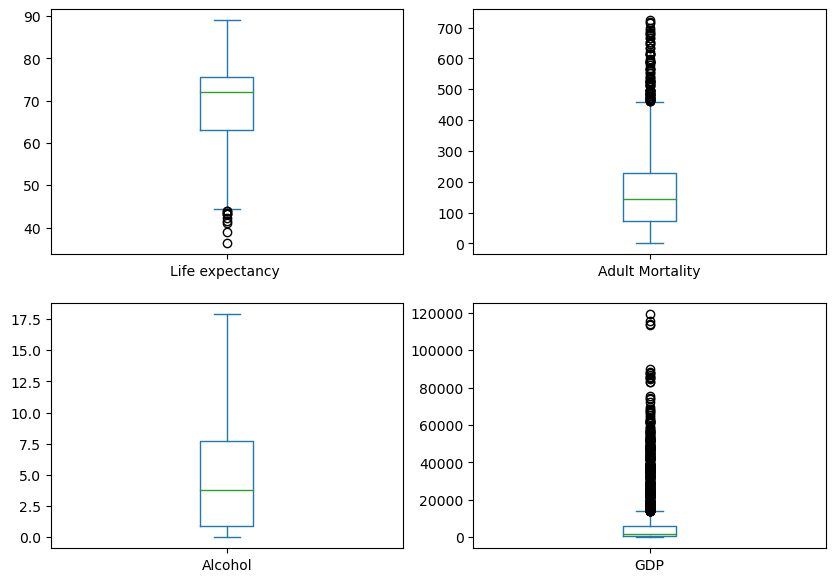

In [11]:
#  plots in 2x2 matrix
colname_matrix = df_subset.columns.to_numpy().reshape(2,2)
fig, axs = plt.subplots(2,2, figsize=(10, 7))

for row in range(2):
    for col in range(2):
        colname_tmp = colname_matrix[row, col]
        
        # set current axis to subplot index
        plt.sca(axs[row, col])
        
        df_subset[colname_tmp].plot.box()
        
plt.show()
plt.close()

In [12]:
df[["Country", "GDP"]].sort_values(by="GDP", ascending=False)

,Country,GDP
1539,Luxembourg,119172.7418
1542,Luxembourg,115761.5770
1545,Luxembourg,114293.8433
1540,Luxembourg,113751.8500
1547,Luxembourg,89739.7117
...,...,...
2901,Yemen,NaN
2902,Yemen,NaN
2903,Yemen,NaN
2904,Yemen,NaN


In [13]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [14]:
df["Country"].value_counts()

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

In [15]:
# drop Country column for now
df = df.drop(columns=["Country"])

In [16]:
df["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [17]:
#Status has two unique values developed and developing

encoded_status = pd.get_dummies(df["Status"], prefix="status")

encoded_status

,status_Developed,status_Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


In [18]:
# drop columns
encoded_status = encoded_status.drop(columns=["status_Developing"])

# drop the original status columns from the WHO DataFrame
df = df.drop(columns=["Status"])

# add the new status_Developed column to the WHO DataFrame
df["status_Developed"] = encoded_status["status_Developed"]

In [19]:
#Object no longer contains dtypes
df.dtypes

Year                                 int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
status_Developed                     uint8
dtype: object

In [20]:
# Nan or INF per column to count them
(~np.isfinite(df)).sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
status_Developed                     0
dtype: int64

#### Data Visualization

In [22]:
#checks for inf values
np.isinf(df).sum()
#we see that that there are no inf values which means all the tests are NaN

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
status_Developed                   0
dtype: int64

In [23]:
from sklearn.impute import KNNImputer

# use imputer
imputer = KNNImputer()

# transform the dataframe and save it into a new DataFrame object
df_clean = pd.DataFrame(imputer.fit_transform(df),
                            columns=df.columns)

In [24]:
(~np.isfinite(df_clean)).sum()
#We imputed all the NaN values using the kNN imputation approach

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
status_Developed                   0
dtype: int64

In [25]:
# Split the cleaned DataFrame into targets and features
targets = df_clean['Life expectancy ']
data = df_clean.drop(columns=['Life expectancy '])

# Split into training/validation/test sets according to 70/15/15 split
from sklearn.model_selection import train_test_split

# split off training set (70% of samples)
x_train, x_remain, y_train, y_remain = train_test_split(data, targets,
                                                        train_size=0.7,
                                                        random_state=42)


# split remainder into test and validation sets
# (15% each, corresponding to half of the remaining non-training samples)
x_val, x_test, y_val, y_test = train_test_split(x_remain, y_remain,
                                                train_size=0.5,
                                                random_state=42)

In [26]:
# numbers check out
n_full = data.shape[0]
train_percent = (x_train.shape[0]/n_full)*100
val_percent = (x_val.shape[0]/n_full)*100
test_percent = (x_test.shape[0]/n_full)*100

print(f"Train set corresponds to {train_percent:.2f}% of the full data.")
print(f"Validation set corresponds to {val_percent:.2f}% of the full data.")
print(f"Test set corresponds to {test_percent:.2f}% of the full data.")

Train set corresponds to 69.98% of the full data.
Validation set corresponds to 15.01% of the full data.
Test set corresponds to 15.01% of the full data.


In [27]:
# import standard scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit (i.e. do the mean/std computation based on the training set features)
# and transform training data
x_train = scaler.fit_transform(x_train).astype("float32")

x_val = scaler.transform(x_val).astype("float32")
x_test = scaler.transform(x_test).astype("float32")
y_train = y_train.astype("float32")
y_val = y_val.astype("float32")
y_test = y_test.astype("float32")

In [28]:
# checking
print("Means of training set:\n", x_train.mean(axis=0), "\n")
print("Standard deviations of training set:\n", x_train.std(axis=0), "\n\n")

print("Means of validation set:\n", x_val.mean(axis=0), "\n")
print("Standard deviations of validation set:\n", x_val.std(axis=0), "\n\n")

print("Means of test set:\n", x_test.mean(axis=0), "\n")
print("Standard deviations of test set:\n", x_test.std(axis=0), "\n\n")

Means of training set:
 [-1.8553975e-09  5.5661924e-09  0.0000000e+00 -5.5661924e-09
  2.7830962e-09 -3.7107950e-09  1.8553975e-09  9.2769875e-10
 -2.7830962e-09 -9.2769875e-10  0.0000000e+00  4.1746442e-09
  1.8553975e-09  9.2769875e-10  1.8553975e-09 -3.7107950e-09
 -1.8553975e-09  2.7830962e-09 -4.1746442e-09 -1.1132385e-08] 

Standard deviations of training set:
 [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99999994 1.         1.         1.
 1.         1.        ] 


Means of validation set:
 [-0.11245106  0.06729227 -0.02169714 -0.03710765  0.07076488 -0.08946922
  0.03060593 -0.06165225 -0.01943558 -0.05814418 -0.00773786 -0.05604865
  0.02040394  0.05562063  0.0457827   0.02856179  0.00576994 -0.11513781
 -0.09370142 -0.03978914] 

Standard deviations of validation set:
 [0.9937836  1.057211   0.80144393 0.9837529  1.1492503  1.0642618
 0.86334425 0.9721492  0.8060862  1.0337036  0.

In [29]:
class net (nn.Module):
    def __init__(self, layers, n_inputs=5):
        super().__init__()
        
        #linear layers activation
        self.layers=[]
        for nodes in layers:
            self.layers.append(nn.Linear(n_inputs,nodes))
            self.layers.append(nn.ReLU())
            n_inputs= nodes
            
        self.layers.append(nn.Linear(n_inputs, 1))
        # build pytorch model as sequence of our layers
        self.model_stack=nn.Sequential(*self.layers)
        
    def forward (self, x):
        # the forward call just takes data (x) and sends it through the model
        # to produce an output
        return self.model_stack(x)
    
    def predict(self, x):
        
        with torch.no_grad():
            self.eval()
            x = torch.tensor(x)
            prediction = self.forward(x).detach().cpu().numpy()
        return prediction
        

In [30]:
from torch.utils.data import TensorDataset, DataLoader
from torch import optim
import torch.nn.functional as F

train_set = TensorDataset(torch.tensor(x_train),
                          torch.from_numpy(y_train.to_numpy()).reshape(-1, 1))
val_set = TensorDataset(torch.tensor(x_val),
                        torch.from_numpy(y_val.to_numpy()).reshape(-1, 1))

# DataLoader objects
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=32)

# set number of epochs
epochs = 10

# build model using a single layer with 64 neurons
reg_model = net(layers=[64], n_inputs = x_train.shape[1])

optimizer = optim.Adam(reg_model.parameters(), lr=1e-3)

# Define loss function.
loss = F.mse_loss

In [31]:
#empty lists for storage of training and validation losses
train_losses = []
val_losses = []

start = time.time()

# outer training loop
for epoch in range(epochs):
    
    running_train_loss = 0
    
    # 
    reg_model.train()

    # training part of outer loop = inner loop
    for batch in train_loader:
        
        data, targets = batch
        output = reg_model(data)
        tmp_loss = loss(output, targets)
        optimizer.zero_grad()
        tmp_loss.backward()
        optimizer.step()
        
        running_train_loss += tmp_loss.item()
    
    print(f"Train loss after epoch {epoch+1}: {running_train_loss/len(train_loader)}")
    train_losses.append(running_train_loss/len(train_loader))
    
    ## validation part of outer loop
    
    running_val_loss = 0
    # deactivate gradient computation
    with torch.no_grad():
        
        # set model to evaluation mode
        reg_model.eval()
        
        # loop over validation DataLoader
        for batch in val_loader:
            
            data, targets = batch
            output = reg_model(data)
            tmp_loss = loss(output, targets)
            running_val_loss += tmp_loss.item()
        
        mean_val_loss = running_val_loss/len(val_loader)
        print(f"Validation loss after epoch {epoch+1}: {mean_val_loss}")
        
        # If the validation loss of the model is lower than that of all the
        # previous epochs, save the model state
        if epoch == 0:
            torch.save(reg_model.state_dict(), "./min_val_loss_reg_model.pt")
        elif (epoch > 0) and (mean_val_loss < np.min(val_losses)):
            print("Lower loss!")
            torch.save(reg_model.state_dict(), "./min_val_loss_reg_model.pt")
        
        val_losses.append(mean_val_loss)

end = time.time()
print(f"Done training {epochs} epochs!")
print(f"Training took {end-start:.2f} seconds!")

Train loss after epoch 1: 4813.806813401442
Validation loss after epoch 1: 4567.316545758928
Train loss after epoch 2: 4470.729458383414
Validation loss after epoch 2: 4061.194318498884
Lower loss!
Train loss after epoch 3: 3770.842987530048
Validation loss after epoch 3: 3187.9828055245534
Lower loss!
Train loss after epoch 4: 2788.452355018029
Validation loss after epoch 4: 2165.0103498186386
Lower loss!
Train loss after epoch 5: 1800.7876539963943
Validation loss after epoch 5: 1338.5292358398438
Lower loss!
Train loss after epoch 6: 1102.761290564904
Validation loss after epoch 6: 843.9974539620536
Lower loss!
Train loss after epoch 7: 697.7664236215445
Validation loss after epoch 7: 577.0631844656808
Lower loss!
Train loss after epoch 8: 477.1679129967323
Validation loss after epoch 8: 434.03479439871654
Lower loss!
Train loss after epoch 9: 365.86350614107573
Validation loss after epoch 9: 354.1279623849051
Lower loss!
Train loss after epoch 10: 304.637994150015
Validation loss a

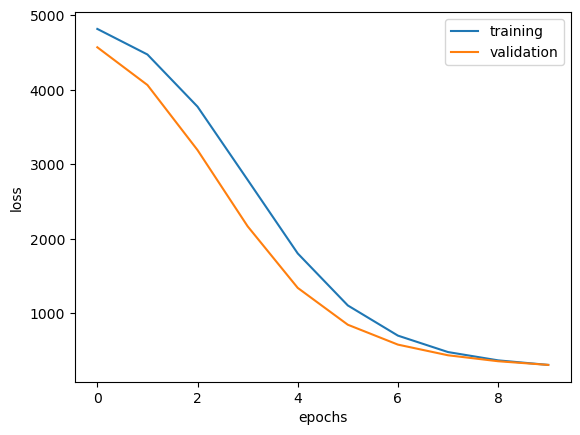

In [32]:
plt.plot(np.arange(epochs), train_losses, label="training")
plt.plot(np.arange(epochs), val_losses, label="validation")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend(loc="upper right")
plt.show()
plt.close()

#Here we trained for only 10 epochs, we can train a little longer to improve results

In [33]:
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             median_absolute_error,
                             max_error, r2_score)

# minimum validation loss model
reg_model.load_state_dict(torch.load("./min_val_loss_reg_model.pt"))

y_pred = reg_model.predict(torch.tensor(x_test))

print("Classification performance report")

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Median Absolute Error: {median_absolute_error(y_test, y_pred):.2f}")
print(f"Max Error: {max_error(y_test, y_pred):.2f}")
print(f"R2 score: {r2_score(y_test, y_pred):.2f}")

Classification performance report
Mean Squared Error: 297.79
Mean Absolute Error: 13.16
Median Absolute Error: 10.13
Max Error: 62.39
R2 score: -2.32


C:\Users\alejo\AppData\Local\Temp\ipykernel_11680\2333372929.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


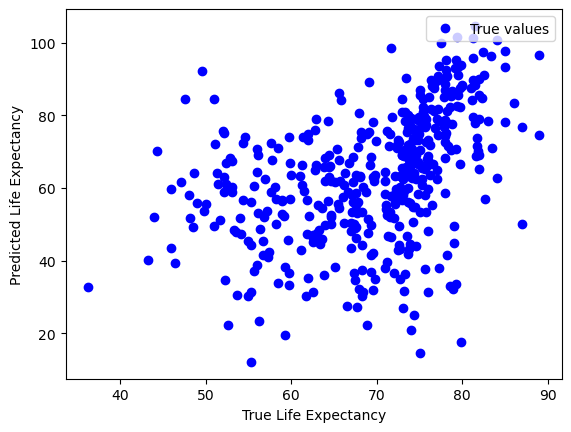

In [34]:
plt.errorbar(y_test, y_pred, fmt='bo', label="True values")
plt.xlabel("True Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.legend(loc="upper right")
plt.show()
plt.close()